# **Lab 6**
# CS 391 E1: Foundations of Data Science, Spring 2021
### Dr. Dora Erdos (Instructor), Hannah Catabia (Teaching Fellow)

### **1. Understanding OLS Linear Regression**

http://mlwiki.org/index.php/Normal_Equation

### **2. Regression in Python**

In [ ]:
import pandas as pd
from numpy.linalg import svd, norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv('https://raw.githubusercontent.com/catabia/cs391_spring21/main/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
5,5.40,3.90,1.70,0.40,setosa
6,4.60,3.40,1.40,0.30,setosa
7,5.00,3.40,1.50,0.20,setosa
8,4.40,2.90,1.40,0.20,setosa
9,4.90,3.10,1.50,0.10,setosa


**Linear Regression**

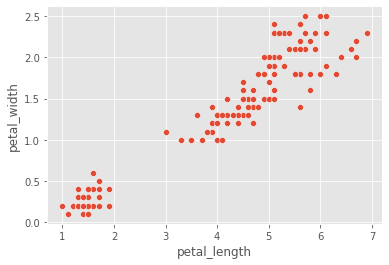

In [ ]:
# linear regression

sns.scatterplot(x='petal_length', y= 'petal_width', data=df)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[['petal_length', 'sepal_length', 'sepal_width']]
y = df.petal_width

model.fit(X, y)

print(model.coef_)
print(model.intercept_)

model.predict(X)


[ 0.52608818 -0.21027133  0.22877721]
-0.248723586024453


array([0.21613634, 0.143802  , 0.17900289, 0.28236993, 0.26004119,
       0.40239228, 0.29839428, 0.26689457, 0.22605994, 0.21928854,
       0.2514192 , 0.36155765, 0.16482913, 0.11213834, 0.07811738,
       0.34848185, 0.19195701, 0.21613634, 0.31643316, 0.33737832,
       0.28800367, 0.3145006 , 0.13371445, 0.32820735, 0.51938411,
       0.2279925 , 0.31950339, 0.24771802, 0.17223148, 0.33682934,
       0.29292449, 0.18278604, 0.38498435, 0.29217186, 0.21928854,
       0.06331267, 0.07941899, 0.21928854, 0.19632884, 0.24586743,
       0.18455465, 0.01515766, 0.24208429, 0.34238111, 0.54781359,
       0.16482913, 0.38998714, 0.25263884, 0.27244633, 0.19140803,
       1.48407864, 1.5050238 , 1.58744569, 1.22532442, 1.4450946 ,
       1.56070285, 1.65414629, 1.00610321, 1.44694519, 1.32730788,
       0.99878283, 1.40657757, 1.09731103, 1.60468967, 1.13112834,
       1.36645587, 1.62748542, 1.30636272, 1.31830086, 1.19744391,
       1.76798592, 1.21355023, 1.57634216, 1.58181195, 1.33117

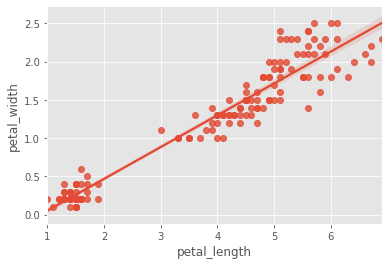

In [ ]:
sns.regplot(x='petal_length', y= 'petal_width', data=df)

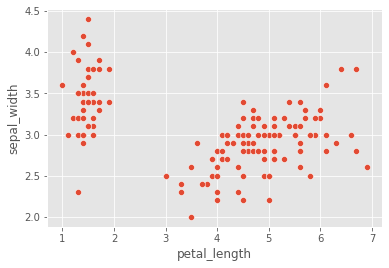

In [ ]:
sns.scatterplot(x='petal_length', y= 'sepal_width', data=df)

**Polynomial Regression**

In [ ]:
# code adapted from: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = df[['petal_length', 'petal_width']]
y = df.sepal_width

poly_feat_fit = PolynomialFeatures(degree=2)
X_poly = poly_feat_fit.fit_transform(X)
#print(X.iloc[:3])
#print(X_poly[:3,:])
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# For two features (a and b), the coefficients are given as:
# [1, a, b, a^2, ab, b^2]
# For more info, see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures
pol_reg.coef_


array([ 0.        , -0.68820327, -0.04625405,  0.03568427,  0.18882141,
       -0.1405867 ])

**Logistic Regression**

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
X = df.drop(['species'], axis=1)
# encode the categorical data with numerical values
y = df["species"].astype('category').cat.codes
print(df.species)
print(y)

model.fit(X, y)

pred = model.predict(X)

pred

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
5          setosa
6          setosa
7          setosa
8          setosa
9          setosa
10         setosa
11         setosa
12         setosa
13         setosa
14         setosa
15         setosa
16         setosa
17         setosa
18         setosa
19         setosa
20         setosa
21         setosa
22         setosa
23         setosa
24         setosa
25         setosa
26         setosa
27         setosa
28         setosa
29         setosa
30         setosa
31         setosa
32         setosa
33         setosa
34         setosa
35         setosa
36         setosa
37         setosa
38         setosa
39         setosa
40         setosa
41         setosa
42         setosa
43         setosa
44         setosa
45         setosa
46         setosa
47         setosa
48         setosa
49         setosa
50     versicolor
51     versicolor
52     versicolor
53     versicolor
54     versicolor
55     ver

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

https://seaborn.pydata.org/tutorial/regression.html